
**Group B NLP Graded Assignent 1**





In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score, accuracy_score, log_loss

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
# df=pd.read_csv("/content/gdrive/MyDrive/Sentiment_Data.csv")






file_path = '/content/gdrive/MyDrive/Sentiment_Data.csv'
with open(file_path, 'rb') as f:
  result = f.read().decode('utf-8', errors='replace')

# Now you can load the decoded content into a pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(result))
print(df.head())

Mounted at /content/gdrive
                                               Tweet Sentiment
0  @_angelica_toy Happy Anniversary!!!....The Day...  Mild_Pos
1  @McfarlaneGlenda Happy Anniversary!!!....The D...  Mild_Pos
2  @thevivafrei @JustinTrudeau Happy Anniversary!...  Mild_Pos
3  @NChartierET Happy Anniversary!!!....The Day t...  Mild_Pos
4  @tabithapeters05 Happy Anniversary!!!....The D...  Mild_Pos


In [8]:
df.columns

Index(['Tweet', 'Sentiment'], dtype='object')

In [9]:
df.head()

,Tweet,Sentiment
0,@_angelica_toy Happy Anniversary!!!....The Day...,Mild_Pos
1,@McfarlaneGlenda Happy Anniversary!!!....The D...,Mild_Pos
2,@thevivafrei @JustinTrudeau Happy Anniversary!...,Mild_Pos
3,@NChartierET Happy Anniversary!!!....The Day t...,Mild_Pos
4,@tabithapeters05 Happy Anniversary!!!....The D...,Mild_Pos


In [10]:
df.shape

(451332, 2)

In [65]:
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

In [66]:
onehot_encoder = OneHotEncoder(sparse=False)
sentiment_onehot = onehot_encoder.fit_transform(df['sentiment_encoded'].values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# df.groupby('Tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

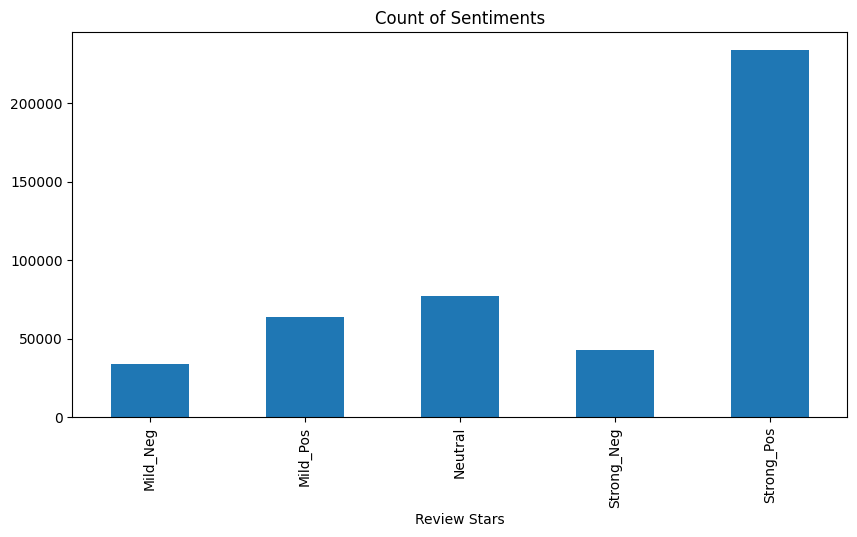

In [67]:
ax = df['Sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Sentiments',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [70]:
def basic_tokenizer(text):
    return re.findall(r'\b\w+\b', text.lower())

In [69]:
def combine_unigrams_bigrams(text):
    tokens = basic_tokenizer(text)
    unigrams = tokens
    bigrams = [' '.join(bigram) for bigram in zip(tokens, tokens[1:])]
    return unigrams + bigrams

In [68]:
df['Tweet'] = df['Tweet'].astype(str).fillna('')
df

,Tweet,Sentiment,combined_text,sentiment_encoded
0,happy anniversary the day the freedumb died in...,Mild_Pos,_angelica_toy happy anniversary the day the fr...,1
1,happy anniversary the day the freedumb died in...,Mild_Pos,mcfarlaneglenda happy anniversary the day the ...,1
2,happy anniversary the day the freedumb died in...,Mild_Pos,thevivafrei justintrudeau happy anniversary th...,1
3,happy anniversary the day the freedumb died in...,Mild_Pos,nchartieret happy anniversary the day the free...,1
4,happy anniversary the day the freedumb died in...,Mild_Pos,tabithapeters05 happy anniversary the day the ...,1
...,...,...,...,...
451327,gaza peace n freedom viva palestina convoy ent...,Strong_Pos,gaza peace n freedom viva palestina convoy ent...,4
451328,face of defense soldier finds freedom in u s f...,Strong_Pos,face of defense soldier finds freedom in u s f...,4
451329,face of defense soldier finds freedom in u s f...,Strong_Pos,face of defense soldier finds freedom in u s f...,4
451330,gaza peace n freedom israel stops aid convoy e...,Strong_Pos,gaza peace n freedom israel stops aid convoy e...,4


In [71]:
df['combined_text'] = df['Tweet'].apply(lambda x: ' '.join(combine_unigrams_bigrams(x)))


In [72]:
# SLANG DICT
from bs4 import BeautifulSoup
import requests, json
resp = requests.get("http://www.netlingo.com/acronyms.php")
soup = BeautifulSoup(resp.text, "html.parser")
slangdict= {}
key=""
value=""
for div in soup.findAll('div', attrs={'class':'list_box3'}):
    for li in div.findAll('li'):
        for a in li.findAll('a'):
            key =a.text
            value = li.text.split(key)[1]
            slangdict[key]=value

# with open('myslang.json', 'w') as f:
#     json.dump(slangdict, f, indent=2)

In [73]:
# prompt: find the dictionary size

dictionary_size = len(slangdict)
print(f"Dictionary size: {dictionary_size}")

Dictionary size: 2892


In [74]:
pip install emoji

In [75]:
type(df)

pandas.core.frame.DataFrame

In [76]:
import pandas as pd
import re
import emoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# apply regex function to remove punctuations'
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert emojis to text
    text = emoji.demojize(text)
    # Replace slang and abbreviations
    for slang, full_form in slangdict.items():
        text = re.sub(r'\b' + re.escape(slang) + r'\b', full_form, text)
        return text
    return text

df['Tweet'] = df['Tweet'].apply(preprocess_text)

In [77]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())

In [78]:
X = vectorizer.fit_transform(df['combined_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [36]:
y = df['Sentiment']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [90]:
nb = MultinomialNB()

# Train the classifier
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)
y_pred_proba = nb.predict_proba(X_test)
y_train_pred_proba = nb.predict_proba(X_train)

# Evaluate the model
f1 = f1_score(y_test, y_pred, average='weighted')
auc_score = roc_auc_score(y_train, y_train_pred_proba, multi_class='ovr')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC Score:", auc_score)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 0.587623383960916
AUC Score: 0.8866724680992129
F1-Score: 0.5863051010492968
Confusion Matrix:
 [[ 1104  1235   914  2378  1232]
 [  339  4535  1227  2288  4507]
 [  561  1974  6893  2677  3321]
 [  402   977   818  5349   964]
 [  586  3996  3267  3561 35162]]
Classification Report:
               precision    recall  f1-score   support

    Mild_Neg       0.37      0.16      0.22      6863
    Mild_Pos       0.36      0.35      0.35     12896
     Neutral       0.53      0.45      0.48     15426
  Strong_Neg       0.33      0.63      0.43      8510
  Strong_Pos       0.78      0.76      0.77     46572

    accuracy                           0.59     90267
   macro avg       0.47      0.47      0.45     90267
weighted avg       0.60      0.59      0.59     90267



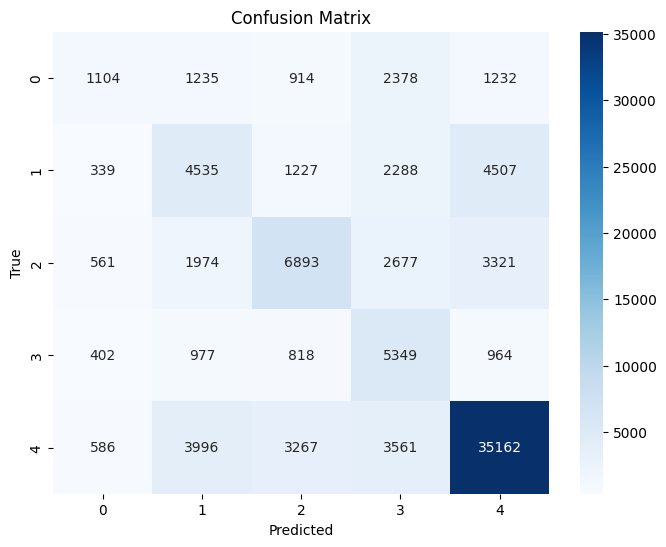

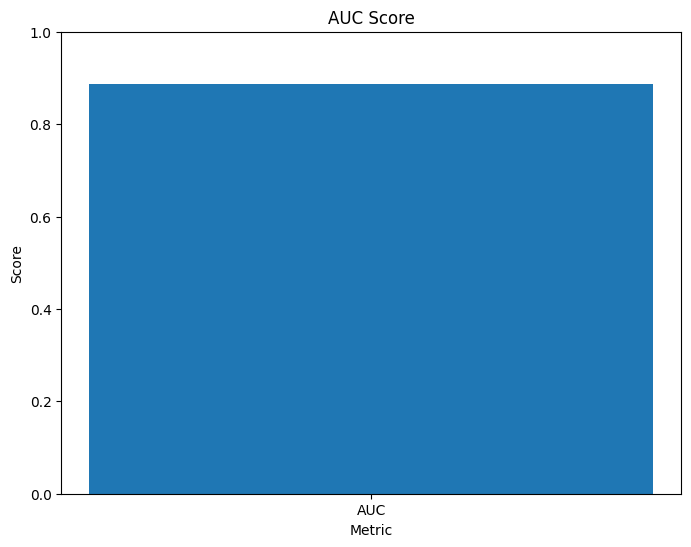

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(['AUC'], [auc_score])
plt.title('AUC Score')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()